# Chapter 4: AI Regression 1

## Primer on lines and parabolas

### Lines

A straight line in cartesian coordinate system $(x,y)$ is represented as:
$$ y = a + bx $$
where $a$ and $b$ are called coefficients and have concrete values.

 - $a$ is the intercept
 - $b$ is the slope

We have for example the line $ y = 1 + 2x $ with the following table values and graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def line(x): return 1+2*x
x = np.arange(5)
print("x  y")
for i in x:
    print("{}  {}  ".format(i, line(i)))

x  y
0  1  
1  3  
2  5  
3  7  
4  9  


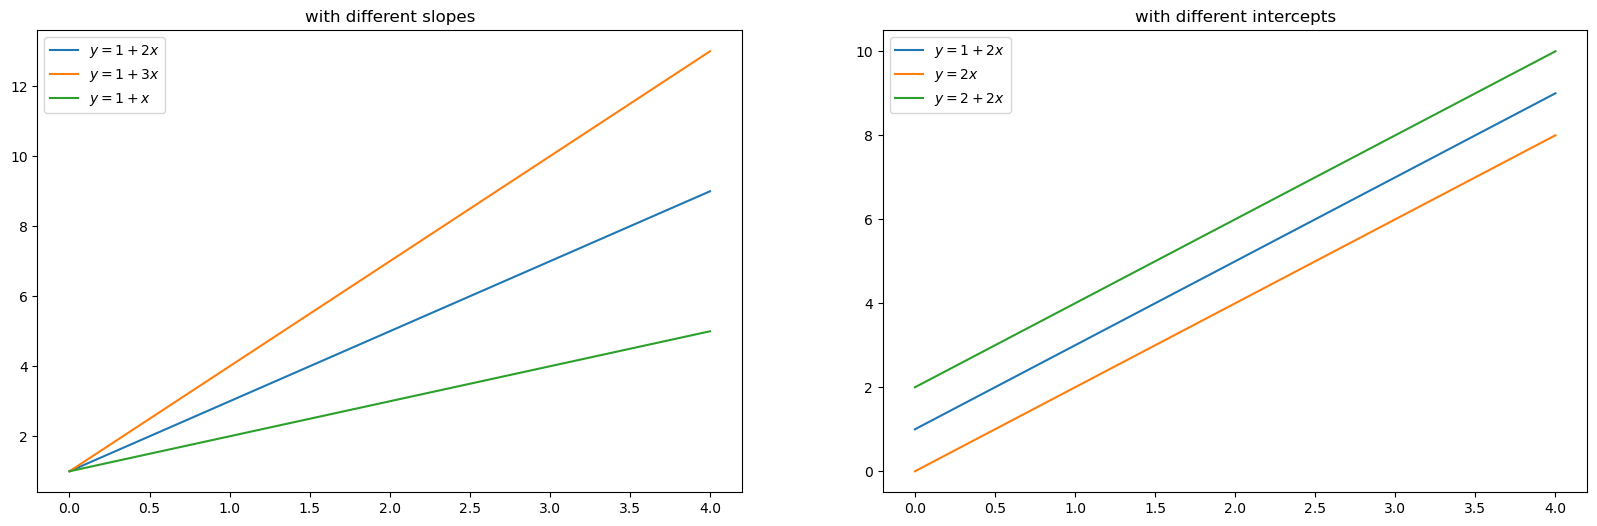

In [3]:
def line2(x): return 1 + 3*x
def line3(x): return 1 + x

fig, axs = plt.subplots(1,2, figsize=(20,6))
axs[0].plot(x, line(x))
axs[0].plot(x, line2(x))
axs[0].plot(x, line3(x))
axs[0].legend(["$y=1+2x$","$y=1+3x$","$y=1+x$"])
axs[0].set_title("with different slopes")

def line4(x): return 2*x
def line5(x): return 2 + 2*x

axs[1].plot(x, line(x))
axs[1].plot(x, line4(x))
axs[1].plot(x, line5(x))
axs[1].legend(["$y=1+2x$","$y=2x$","$y=2+2x$"])
axs[1].set_title("with different intercepts")
plt.show()

### Parabolas

Consider a parabolas given by the following quadratic polynomial
$$ y = ax^2 + bx + c $$

with
- $c$ the intercept
- $a > 0$ open upward, $a <0 $ open downward

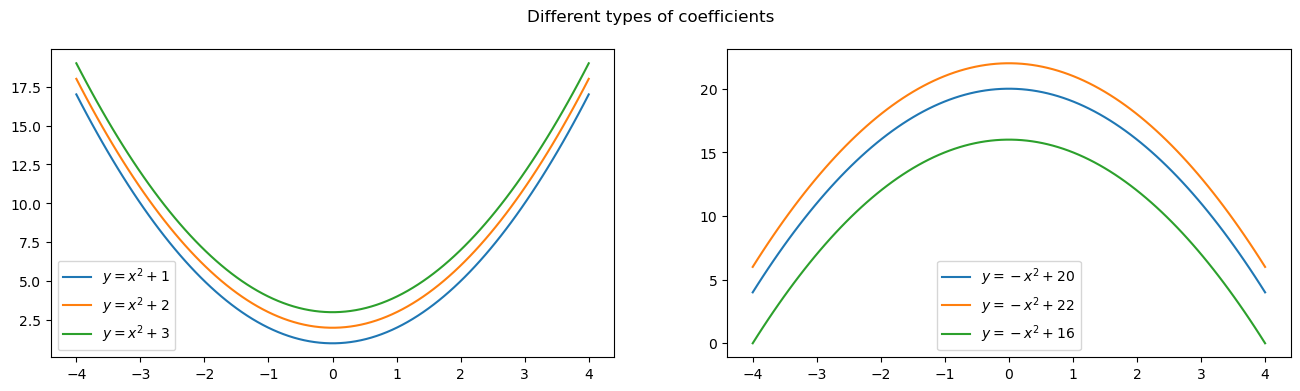

In [21]:
def line(x): return x**2 + 1
def line2(x): return x**2 + 2
def line3(x): return x**2 + 3
def line4(x): return -x**2 + 20
def line5(x): return -x**2 + 22
def line6(x): return -x**2 + 16

x = np.linspace(-4,4,100)

fig, axs = plt.subplots(1,2, figsize=(16,4))
axs[0].plot(x,line(x))
axs[0].plot(x,line2(x))
axs[0].plot(x,line3(x))
axs[0].legend(["$y=x^2+1$","$y=x^2+2$","$y=x^2+3$"])

axs[1].plot(x,line4(x))
axs[1].plot(x,line5(x))
axs[1].plot(x,line6(x))
axs[1].legend(["$y=-x^2+20$","$y=-x^2+22$","$y=-x^2+16$"])

fig.suptitle("Different types of coefficients")
plt.show()

## Simple linear regression

In a nutshell, simple linear regression is the investigation of a linear relationship between an independent variable $x$ (also called predictors, explanatory variables or inputs) and a dependent variable $y$ (or target variable, output).

We can observe in the following graph that there is a linear relationship between x and y values.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

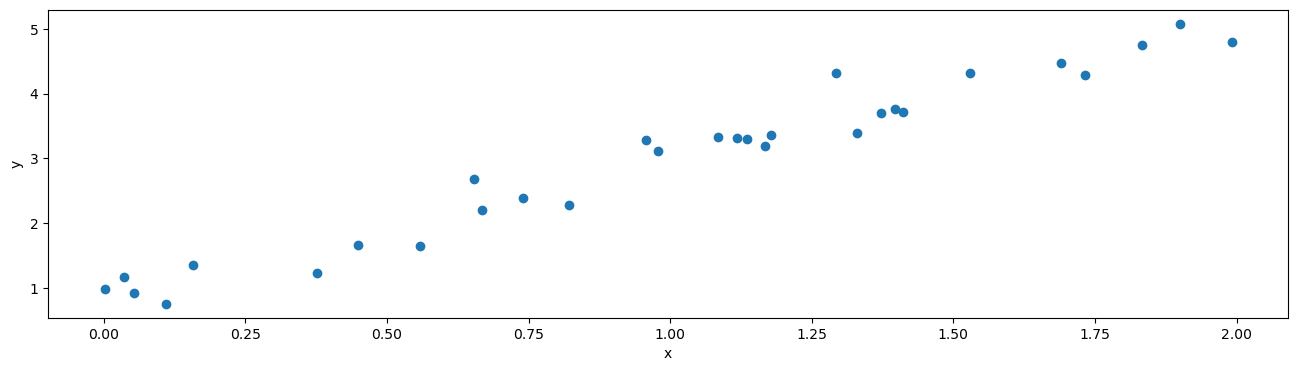

In [17]:
path = os.path.join(os.getcwd(), "data/linreg_data.csv")
data = pd.read_csv(path, names = ["x","y"])

plt.figure(figsize=(16,4))
plt.scatter(data.x, data.y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In simple linear regression we assume that the underlying model is the linear model

$$ \hat{y} = a + bx $$

where $\hat{y}$ is the predicted value of $y$.

The goal is to estimate the parameters $a$ and $b$ that fits the best our data points. We want to find a line that minimize the distance between the true value $y_i$ and $\hat{y}_i$ for each $i$ .

We form the residual sum of squares as

$$ RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - a - bx_i)^2 $$

We would like to make this value as small as possible in order to have the smallest total error, in other word, $\hat{a}$ and  $\hat{b}$ solve the following minimization problem.

$$ (\hat{a}, \hat{b}) = \underset{a,b}{\operatorname{argmin}} \sum_{i=1}^n (y_i - a - b x_i)^2 
$$

The graph below illustrates the result of the problem statement with the residuals (error distance between ${y_i}$ and ${\hat{y}_i}$).

const    0.840399
x        2.138776
dtype: float64


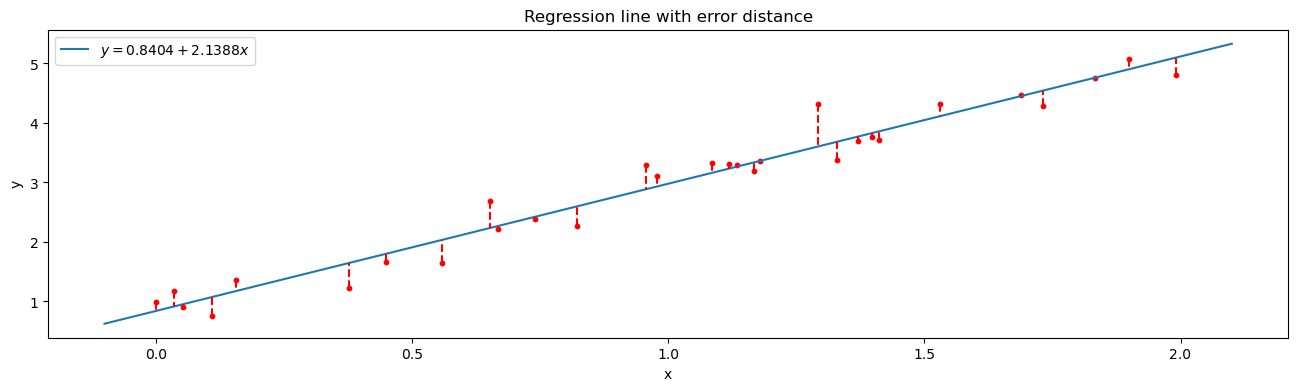

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = data.x
y = data.y
# Add constant to x for statsmodels
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()
coeff = model.params

print(coeff)

x = np.linspace(-0.1,2.1, 100)
y = coeff.const + coeff.x*x
yhat = coeff.const + coeff.x*data.x

plt.figure(figsize=(16,4))
plt.plot(x,y)
plt.scatter(data.x,data.y, c = "r" , s = 10)
plt.legend(["$y = {:.4f} + {:.4f}x $".format(coeff.const, coeff.x)])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with error distance")
for i in range(len(data.x)):
    plt.vlines(data.x[i],data.y[i],yhat[i], linestyles='--', colors = 'red')
plt.show()

### Model evaluation

The accuracy of the model can be evaluated by computing the $RMSE$ (Root Mean Square Error)
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

Note that 

$$ RMSE = \frac{1}{\sqrt{n}}\sqrt{RSS} $$

There are also other error quantities such as $MAE$ (Mean Absolute Error)
$$ MAE = \frac{1}{n}\sum_{i}^n \left| y_i - \hat{y}_i \right| $$

and $MSE$ (Mean Squared Error)
$$ MSE = \frac{1}{n}\sum_{i}^n (y_i - \hat{y}_i)^2 $$

Another standard of measure of goodness of fit is the coefficient of determination $R2$ defined by:
$$ R^2 = 1 - \frac{\sum_{i}^2(y_i - \hat{y}_i)^2}{\sum_{i}^2(y_i - \overline{y})^2} $$

where $\overline{y}$ is the mean of all the $y_i$

$R^2$ is between 0 and 1 where $R^2 = 1$ would mean that all predicted values match the actual values.

### Simple linear regression in python from scratch

We reuse the same dataset from above and do the calculation step by step.

We first import the data and inspect them

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.path.join(os.getcwd(), "data/linreg_data.csv")

data = pd.read_csv(path,skiprows=0,names=["x","y"])
data.head()

,x,y
0,0.558839,1.643261
1,1.135218,3.298449
2,1.292233,4.317444
3,1.731773,4.292910
4,0.376881,1.234585


It is also a good idea to have a visual view of our data by plotting them.

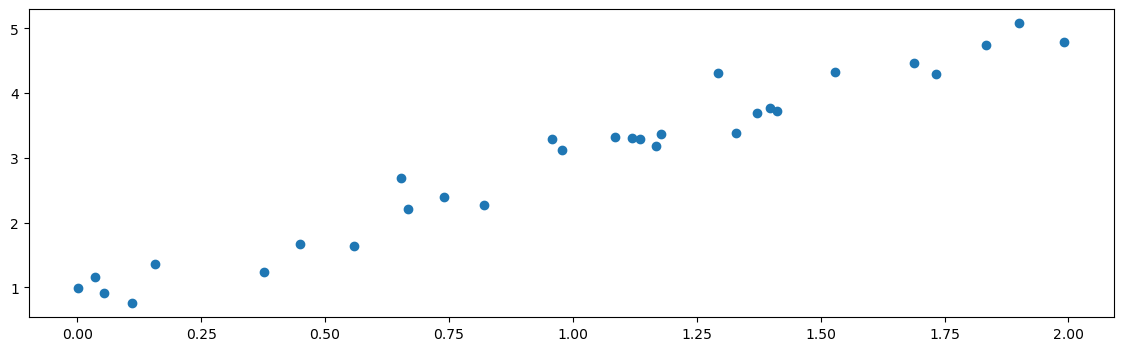

In [9]:
xpd = data["x"]
ypd = data["y"]
n = xpd.size
plt.figure(figsize=(14,4))
plt.scatter(xpd,ypd)
plt.show()

We compute $\overline{x}$ and $\overline{y}$ the mean of $x_i$ and $y_i$

In [10]:
xbar = np.mean(xpd)
ybar = np.mean(ypd)

Then $\sum_{i=1}^n x_i y_i $  and $\sum_{i=1}^n x_i^2 $

In [11]:
term1 = np.sum(xpd*ypd)
term2 = np.sum(xpd**2)

and finally our coefficients that solves the minimization problem above:
$$ \hat{b} = \frac{\sum_{i=1}^n x_i y_i - n\overline{x}y}{\sum_{i=1}^n x_i^2 - n\overline{x}^2} $$
$$ \hat{a} = \overline{y} - b\overline{x} $$

In [12]:
b = (term1 - n*xbar*ybar)/(term2-n*xbar*xbar)
a = ybar - b*xbar
print("Coefficient a: {:.5f}".format(a))
print("Coefficient b: {:.5f}".format(b))

Coefficient a: 0.84040
Coefficient b: 2.13878


We can plot our results

In [13]:
x = np.linspace(0,2,100)
y = a + b